---
Data analysis
---
1. 

2. 

3. 

In [52]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data  = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_df = pd.merge(ride_data, city_data, how="left",on="city")

# Display the data table for preview
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [87]:
urban_rides_df = combined_df.loc[combined_df["type"] == "Urban"]
suburban_rides_df = combined_df.loc[combined_df["type"] == "Suburban"]
rural_rides_df = combined_df.loc[combined_df["type"] == "Rural"]

urban_rides_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [102]:
#calculations for urban

urban_group =  urban_rides_df.groupby(["city"])

total_fare = urban_group["fare"].sum()
total_rides = urban_rides_df["city"].value_counts()
avg_fare = total_fare / total_rides
driver_count = urban_group["driver_count"].count()

sum_urban = pd.DataFrame({
    "Total Fare": total_fare,
    "Total Rides": total_rides,
    "Avg Fare": avg_fare,
    "Driver Count": driver_count
})

sum_urban.head()

,Total Fare,Total Rides,Avg Fare,Driver Count
Amandaburgh,443.55,18,24.641667,18
Barajasview,557.31,22,25.332273,22
Carriemouth,764.49,27,28.314444,27
Christopherfurt,661.55,27,24.501852,27
Deanville,491.01,19,25.842632,19


In [109]:
#calculations for suburban

suburban_group =  suburban_rides_df.groupby(["city"])

total_fare = suburban_group["fare"].sum()
total_rides = suburban_rides_df["city"].value_counts()
avg_fare = total_fare / total_rides
driver_count = suburban_group["driver_count"].count()

sum_suburban = pd.DataFrame({
    "Total Fare": total_fare,
    "Total Rides": total_rides,
    "Avg Fare": avg_fare,
    "Driver Count": driver_count
})

sum_suburban.head()

,Total Fare,Total Rides,Avg Fare,Driver Count
Barronchester,582.76,16,36.422500,16
Bethanyland,593.21,18,32.956111,18
Brandonfort,673.31,19,35.437368,19
Colemanland,679.68,22,30.894545,22
Davidfurt,543.93,17,31.995882,17


In [110]:
#calculations for rural

rural_group =  rural_rides_df.groupby(["city"])

total_fare = rural_group["fare"].sum()
total_rides = rural_rides_df["city"].value_counts()
avg_fare = total_fare / total_rides
driver_count = rural_group["driver_count"].count()

sum_rural = pd.DataFrame({
    "Total Fare": total_fare,
    "Total Rides": total_rides,
    "Avg Fare": avg_fare,
    "Driver Count": driver_count
})

sum_rural.head()

,Total Fare,Total Rides,Avg Fare,Driver Count
Bradshawfurt,400.64,10,40.064000,10
Garzaport,72.37,3,24.123333,3
Harringtonfort,200.82,6,33.470000,6
Jessicaport,216.08,6,36.013333,6
Lake Jamie,206.15,6,34.358333,6


## Bubble Plot of Ride Sharing Data

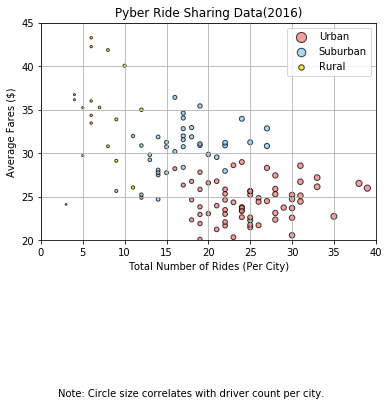

In [119]:
# Obtain the x and y coordinates for each of the three city types

urban_total_rides = sum_urban["Total Rides"]
urban_avg_fare = sum_urban["Avg Fare"]
urban_driver_count = sum_urban["Driver Count"]

suburban_total_rides = sum_suburban["Total Rides"]
suburban_avg_fare = sum_suburban["Avg Fare"]
suburban_driver_count = sum_suburban["Driver Count"]

rural_total_rides = sum_rural["Total Rides"]
rural_avg_fare = sum_rural["Avg Fare"]
rural_driver_count = sum_rural["Driver Count"]


# Build the scatter plots for each city types

plt.scatter(urban_total_rides, urban_avg_fare,\
            marker="o", facecolors="lightcoral", edgecolors="black",\
           alpha=0.75, s=urban_driver_count, label="Urban")

plt.scatter(suburban_total_rides, suburban_avg_fare,\
            marker="o", facecolors="lightskyblue", edgecolors="black",\
           alpha=0.75, s=suburban_driver_count, label="Suburban")

plt.scatter(rural_total_rides, rural_avg_fare,\
            marker="o", facecolors="gold", edgecolors="black",\
           alpha=0.75, s=rural_driver_count, label="Rural")


# Incorporate the other graph properties
plt.xlim(0, 40)
plt.ylim(20, 45)
plt.grid()
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fares ($)")
plt.text(2,2,'Note: Circle size correlates with driver count per city.')

# Create a legend
plt.legend(loc="best", markerscale=2)
# Incorporate a text label regarding circle size

# Save Figure
plt.savefig("Images/pyber_bubble_plot.png")

In [ ]:
# Show plot
plt.show()


## Total Fares by City Type

FileNotFoundError: [Errno 2] No such file or directory: '../Images/pyber_pie_total_fares.png'

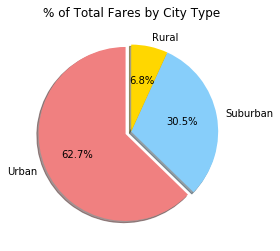

In [114]:
# Calculate Type Percents
city_type = ["Urban", "Suburban", "Rural"]
urban_percent = urban_rides_df["fare"].sum() / combined_df["fare"].sum()
suburban_percent = suburban_rides_df["fare"].sum() / combined_df["fare"].sum()
rural_percent = rural_rides_df["fare"].sum() / combined_df["fare"].sum()

percent_fares = [urban_percent, suburban_percent, rural_percent]

# Build Pie Chart

types = ["Urban", "Suburban", "Rural"]
colors= ["lightcoral","lightskyblue", "gold"]
explode = (0.07, 0, 0)

plt.title("% of Total Fares by City Type")
plt.pie(percent_fares, explode=explode, labels=types, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=90)

# Save Figure
plt.savefig("../Images/pyber_pie_total_fares.png")

In [ ]:
# Show Figure
plt.show()


## Total Rides by City Type

In [ ]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure
plt.savefig("Images/pyber_pie_total_rides.png")

In [ ]:
# Show Figure
plt.show()


## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure
plt.savefig("Images/pyber_pie_total_drivers.png")

In [ ]:
# Show Figure
plt.show()
